In [16]:
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X_train = np.linspace(-1, 1, 20)

In [8]:
y_train = np.array([-0.651, -0.3099, -0.5,-0.50855,-0.25,-0.24,-0.024, -0.001, -0.2006,
                        0.07475, -0.1422, 0.06515, 0.15265, 0.35211, 0.28415, 0.5524, 
                        0.23115, 0.20835, 0.4211, 0.60485])



20

In [4]:
X_test = np.linspace(-1,1,20)

In [9]:
y_test = np.array([-0.69, -0.451, -0.44005, -0.4484, -0.1475,
                    -0.5019, -0.28055, 0.2455, -0.21415, -0.0286, 0.23415, 0.46575, 0.07955, 0.1973, 
                    0.0719, 0.03639, 0.5539, 0.3365, 0.50705, 0.33435])


20

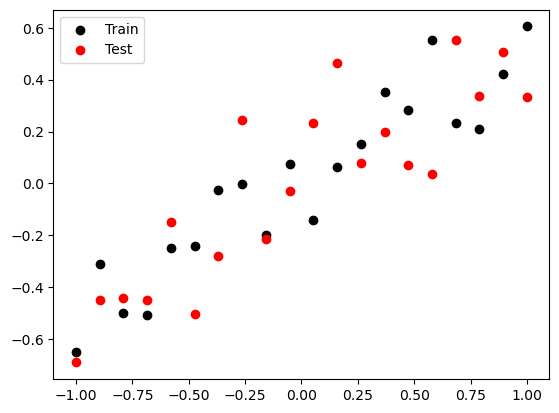

In [14]:
plt.scatter(X_train, y_train, c="black", label="Train")
plt.scatter(X_test, y_test, c="r", label="Test")
plt.legend()
plt.show()

Regression Model

In [18]:
model = Sequential()

model.add(Dense(128, input_dim=1,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=adam, metrics=['mse'])

In [19]:
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_test, y_test),verbose=True)

Epoch 1/500
1/1 [==============================] - 1s 681ms/step - loss: 0.1226 - mse: 0.1226 - val_loss: 0.0315 - val_mse: 0.0315
Epoch 2/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0533 - val_mse: 0.0533
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0421 - val_mse: 0.0421
Epoch 4/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0232 - mse: 0.0232 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 5/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 6/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 7/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 8/500
1/1 [==============================] - 0s 35ms/step - loss: 0.0190 - mse: 0.0

In [22]:
model.evaluate(X_train, y_train)[1]

1/1 [==============================] - 0s 16ms/step - loss: 0.0037 - mse: 0.0037


0.0037269971799105406

In [23]:
model.evaluate(X_test, y_test)[1]

1/1 [==============================] - 0s 18ms/step - loss: 0.0549 - mse: 0.0549


0.054919205605983734

In [24]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 84ms/step


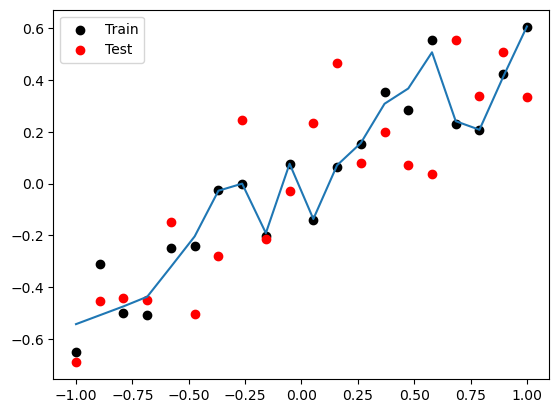

In [25]:
plt.figure()
plt.scatter(X_train, y_train,c="black",label="Train")
plt.scatter(X_test, y_test,c="r",label="Test")
plt.plot(X_test,y_pred)
plt.legend()
plt.show()

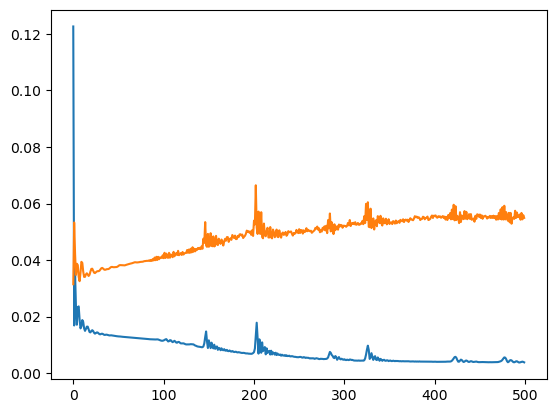

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

From these two curves we can clearly understood overfitting happend on the data. Now we are try to remove overfitting using Dropouts from keras

Dropout Model

In [67]:
model = Sequential()

model.add(Dense(128,input_dim=1, activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,"linear"))

In [68]:
adam = Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=adam, metrics=["mse"])

In [69]:
history = model.fit(X_train, y_train, verbose=True, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500


1/1 [==============================] - 1s 992ms/step - loss: 0.1591 - mse: 0.1591 - val_loss: 0.0373 - val_mse: 0.0373
Epoch 2/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 3/500
1/1 [==============================] - 0s 43ms/step - loss: 0.0367 - mse: 0.0367 - val_loss: 0.0523 - val_mse: 0.0523
Epoch 4/500
1/1 [==============================] - 0s 45ms/step - loss: 0.0479 - mse: 0.0479 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 5/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0332 - mse: 0.0332 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 6/500
1/1 [==============================] - 0s 42ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0468 - val_mse: 0.0468
Epoch 7/500
1/1 [==============================] - 0s 44ms/step - loss: 0.0338 - mse: 0.0338 - val_loss: 0.0518 - val_mse: 0.0518
Epoch 8/500
1/1 [==============================] - 0s 47ms/step - loss: 0.0384 - mse: 0.0384 - val_lo

In [70]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 75ms/step


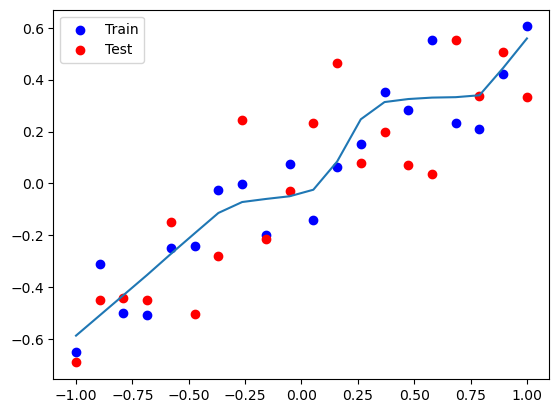

In [71]:
plt.figure()
plt.scatter(X_train, y_train, c="b", label="Train")
plt.scatter(X_test, y_test, c="r",label="Test")
plt.plot(X_test, y_pred)
plt.legend()
plt.show()

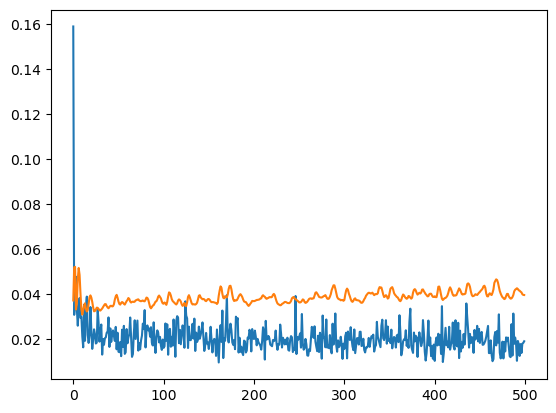

In [72]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


From above these two curves we see overfitting is reduced. The new curve predicted by model is smoother than previous one which means we are now our model learn the pattern in the data instead of noise. And this can be seen through difference between loss and val_loss decreases. 